# Bayesianness

Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

In [2]:
%matplotlib notebook

Defines the model used for the fitting and the negative log likelihood function of that model.

In [3]:
def Model(x, m, c, Noise=0):
    return m*x + c + Noise

def MinusLogLikelihood(Params, xdata, ydata, σ):
    m, c = Params[0], Params[1]
    Regression = 0
    σSum = 0
    for k in range(len(xdata)):
        Regression += (ydata[k] - Model(xdata[k], m, c))**2
        σSum += σ[k]
    σAverage = σSum/len(xdata)
    return len(xdata)/2*np.log(2*np.pi*σAverage**2) + (2*σAverage**2)**-1*Regression

Least-Square fit doesn't work using σ = 1/(yError^2)

In [4]:
def MinusLogLikelihood2(Params, x, y, yError):
    m, c = Params[0], Params[1]
    model = m*x + c
    σ = 1/(yError**2)
    return - (-0.5*(np.sum((y-model)**2*yError - np.log(yError))))

An equation we derived that seems to work.

In [5]:
def MinusLogLikelihood3(Params, x, y, yError):
    m, c = Params[0], Params[1]
    model = m*x + c
    σ = 1/(yError**2)
    return - (-len(yError)/2*np.log(2*np.pi) + np.sum(np.log(σ) - (y-model)**2/(2*σ**2)))

....

Creates a random set of numbers normally distributed and inputting it into y.

In [6]:
SetSeed = True

if SetSeed:
    Seed = 923114
    np.random.seed(Seed)

x = np.random.randn(20)
m, c = 2, 3
Noise = np.random.randn(20)
y = Model(x, m, c, Noise)
yError = np.random.random(20)

This minimises each of the parameters and the standard deviation on the normally distributed noise, in the negative log likelihood function. This gives us the "Best fit parameters" for this data.

In [7]:
x0 = [0, 0]
Minimising = minimize(MinusLogLikelihood3, x0, args=(x, y, yError))

if Minimising.success:
    Params = Minimising.x
    ParamsError = np.sqrt((np.diag(Minimising.hess_inv)))
    print(f'The fitted parameters are m = {round(Params[0], 3)} ± {round(ParamsError[0], 3)}, '
          f'c = {round(Params[1], 3)} ± {round(ParamsError[1], 3)}, Cov = {round(1000*Minimising.hess_inv[0][1], 3)} x 10^-3')
else:
    print('There was an error when minimising this function')

The fitted parameters are m = 1.978 ± 0.512, c = 3.73 ± 0.469, Cov = -42.483 x 10^-3


Values from different log likelihood functions.

In [8]:
MinusLogLikelihood(Params, x, y, yError)

51.02822183977348

In [9]:
MinusLogLikelihood2(Params, x, y, yError)

16.569341905523952

In [10]:
MinusLogLikelihood3(Params, x, y, yError)

-16.922594537607416

In [11]:
Minimising

      fun: -16.922594537607416
 hess_inv: array([[ 0.26236204, -0.0424833 ],
       [-0.0424833 ,  0.22017549]])
      jac: array([-4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([1.97761416, 3.7300958 ])

An array of aribitrary numbers is created to plot the model with the calculated best fit parameters.

In [12]:
xOutput = np.linspace(min(x), max(x), 1000)
yOutput = Model(xOutput, Params[0], Params[1])

<IPython.core.display.Javascript object>


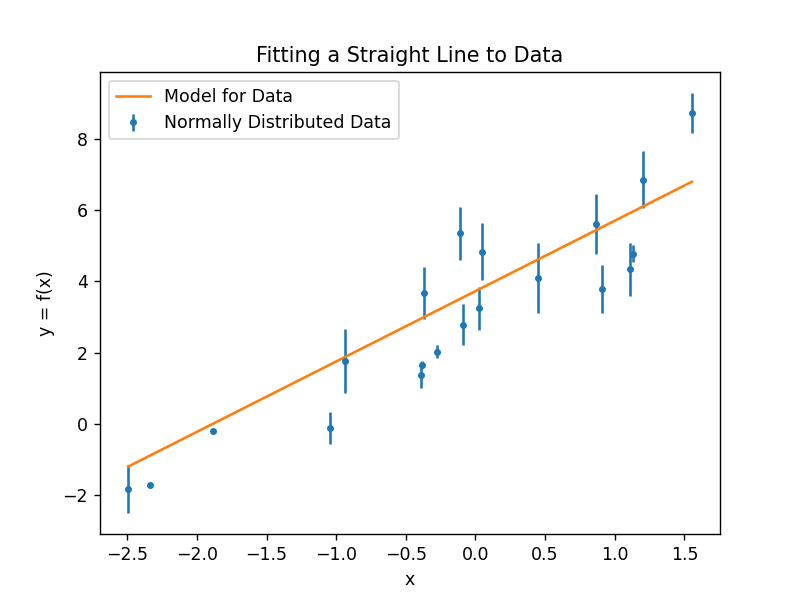

In [13]:
plt.figure()
plt.errorbar(x, y, yerr=yError, fmt='.', label='Normally Distributed Data')
plt.plot(xOutput, yOutput, label='Model for Data')
plt.title('Fitting a Straight Line to Data')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()

## It's Covariancin' Time

Checking the covariance using curve_fit

In [14]:
def CurveFit(X, Y):    
    Parameters, Covarience = curve_fit(Model, X, Y)
    XModel = np.linspace(min(X), max(X), 100)
    YModel = Model(XModel, *Parameters)
    return XModel, YModel, Parameters, Covarience

In [15]:
X, Y, Paramaters, COV = CurveFit(x, y)

It seems to be quite different, which could be a problem....

In [16]:
COV

array([[ 5.41132435e-02, -2.52400227e+05,  2.52400233e+05],
       [-2.52400233e+05,  7.59645135e+14, -7.59645130e+14],
       [ 2.52400233e+05, -7.59645130e+14,  7.59645126e+14]])

<IPython.core.display.Javascript object>


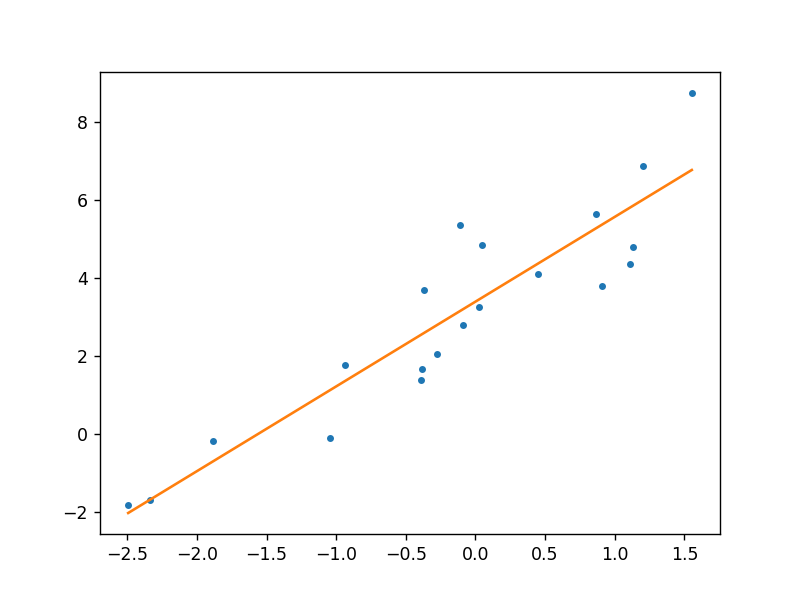

In [17]:
plt.figure()
plt.plot(x, y, '.')
plt.plot(X, Y)
plt.show()